### Beishenbaev Dastan
### AIN-3-21

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import mglearn.datasets


In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print("Ключи : \n{}".format(diabetes.keys()))


Ключи : 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print("Форма массива data : \n{}".format(diabetes.data.shape))

Форма массива data : 
(442, 10)


In [6]:
print("Имена признаков: \n{}".format(diabetes.feature_names))

Имена признаков: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
from sklearn.model_selection import train_test_split
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0 )

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)


clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

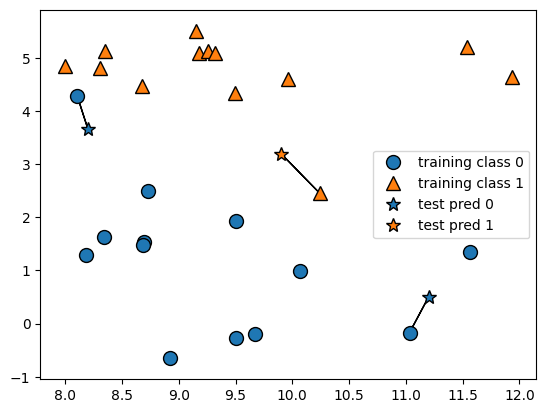

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

Форма массива X: (442, 2)


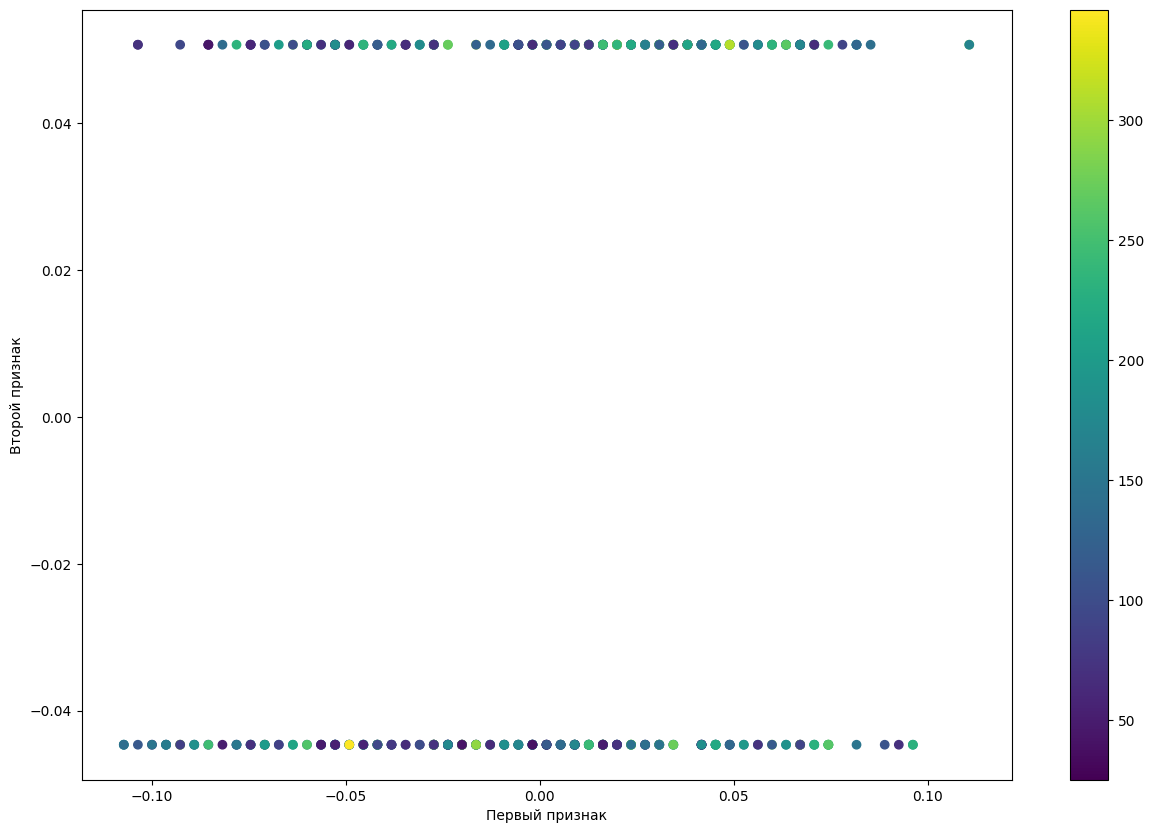

In [118]:
# Строим график для набора данных
%matplotlib inline

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))

In [11]:

print("Прогнозы для тестового набора:\n {}".format(clf.predict(X_test)))

Прогнозы для тестового набора:
 [336. 220. 118.  97. 293. 275.  96. 237.  95. 310. 182. 122. 178.  77.
 332.  43.  68.  63.  99. 268. 252.  88. 225. 210. 229. 262. 170.  48.
 166. 122. 237.  42. 185. 206.  67.  66. 174.  77.  88. 109. 128. 107.
 262. 265. 122.  65. 148. 113.  51. 296. 225.  72. 216. 111. 280. 181.
 121. 150.  67. 237. 310.  25. 140. 111. 265. 113.  31. 306. 229.  72.
  84. 202.  53. 141. 187. 107. 116. 272. 332.  67.  67. 164.  52. 311.
  94. 153. 129. 126.  94.  65.  85.  47.  52. 237.  79. 148. 232. 261.
  83.  97.  66. 143. 241.  73. 275.  80. 306. 242. 144.  53. 129.]


In [12]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))


Правильность на тестовом наборе: 0.01


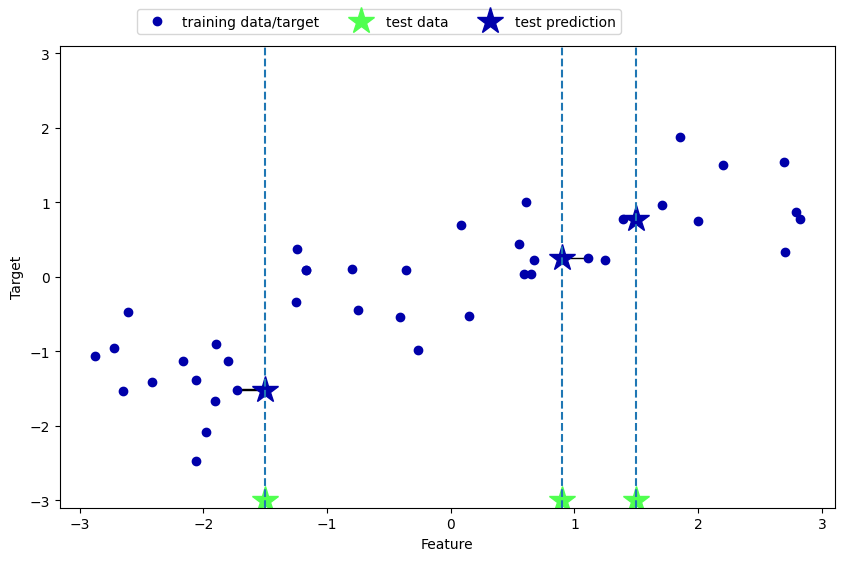

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor


X, y = mglearn.datasets.make_wave(n_samples=40)
reg = KNeighborsRegressor (n_neighbors=31)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=31)

In [15]:
print("Прогнозы для тестового набора:\n {}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
 [228.48387097 212.58064516 149.16129032 136.06451613 156.06451613
 221.87096774 104.09677419 184.29032258 148.5483871  190.74193548
 142.61290323 181.90322581 112.         114.70967742 239.58064516
  92.38709677 115.83870968  82.29032258 101.74193548 199.83870968
 141.29032258 144.19354839 146.29032258 127.51612903 166.64516129
 138.58064516 111.48387097  94.70967742 162.4516129  165.48387097
 175.77419355 101.83870968 124.4516129  159.74193548 162.22580645
 176.38709677 162.16129032 166.58064516 115.38709677 191.16129032
 110.96774194 141.74193548 132.29032258 156.41935484 185.35483871
  90.64516129 119.58064516 121.96774194 141.35483871 207.58064516
 129.93548387  86.64516129 141.25806452 162.12903226 206.83870968
 185.09677419 186.29032258 106.12903226 145.48387097 171.35483871
 177.83870968 146.         159.06451613 121.64516129 222.90322581
 133.4516129  104.58064516 211.29032258 177.16129032  92.48387097
  83.51612903 158.87096774 107.12903226 112.

In [16]:
print("Правильность на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.39


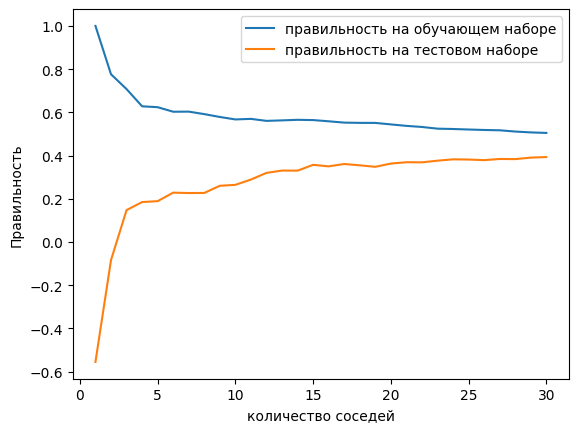

In [17]:
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    # строим модель
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(reg.score(X_train, y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()
plt.show()

w[0]: 0.393906  b: -0.031804


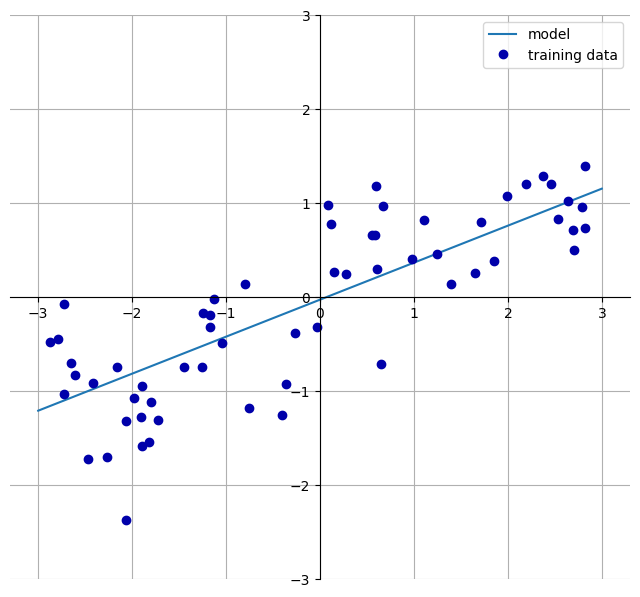

In [18]:
mglearn.plots.plot_linear_regression_wave()

In [19]:
from sklearn.linear_model import LinearRegression

X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30 )
lr =  LinearRegression().fit(X_train, y_train)

In [20]:
print("lr.coef:\n {}".format(lr.coef_))
print("lr.intercept:\n {}".format(lr.intercept_))


lr.coef:
 [  -23.03729935  -260.79433213   507.81069094   366.03081978
 -1268.64669232   859.04452765   295.43854458   120.39160384
   966.00303534    67.14634703]
lr.intercept:
 151.79016486998657


In [21]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.49


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.50


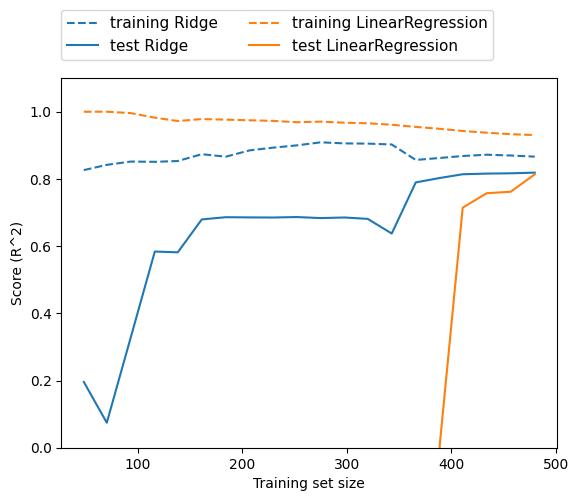

In [46]:
mglearn.plots.plot_ridge_n_samples()


In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.34
Правильность на тестовом наборе: 0.34
Количество использованных признаков: 3.00


In [58]:
lasso0012 = Lasso(alpha=0.012, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso0012.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso0012.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))            

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.50
Количество использованных признаков: 3.00


In [62]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))            

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.49
Количество использованных признаков: 3.00


Text(0, 0.5, 'Оценка коеффицента')

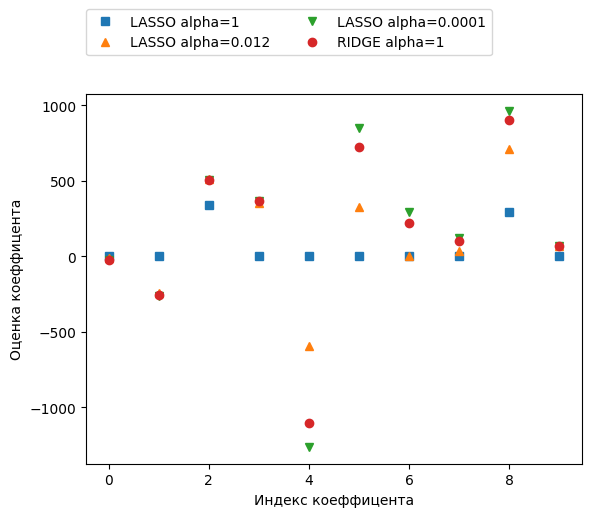

In [75]:
plt.plot(lasso.coef_, 's', label = "LASSO alpha=1")
plt.plot(lasso0012.coef_, '^', label = "LASSO alpha=0.012")
plt.plot(lasso0001.coef_, 'v', label = "LASSO alpha=0.0001")
plt.plot(ridge.coef_, 'o', label = 'RIDGE alpha=1')
plt.legend(ncol = 2, loc=(0, 1.105))
plt.xlabel("Индекс коеффицента")
plt.ylabel("Оценка коеффицента")

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))



Правильность на обучающем наборе: 0.04
Правильность на тестовом наборе: 0.02
Количество использованных признаков: 3.00


In [91]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(logreg100.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.13
Правильность на тестовом наборе: 0.01
Количество использованных признаков: 3.00


In [101]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(logreg001.score(X_test, y_test)))
print("Количество использованных признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.04
Правильность на тестовом наборе: 0.02
Количество использованных признаков: 3.00


Text(0, 0.5, 'Оценка коеффицента')

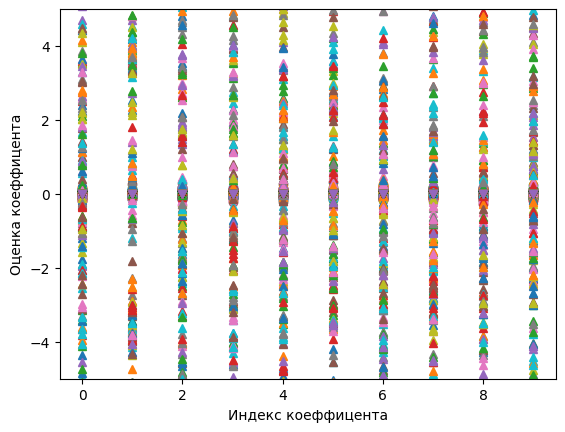

In [115]:
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")

plt.ylim(-5, 5)
plt.xlabel("Индекс коеффицента")
plt.ylabel("Оценка коеффицента")
